# Setup & Dependencies

In [1]:
!python.exe -m pip install --upgrade pip
!pip3 install textblob pandas numpy matplotlib seaborn

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Reading the data
df = pd.read_csv('../assets/datasets/IMDb_Dataset.csv')
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# Convert labels to binary (same as logistic regression notebook)
df.rename(columns={'sentiment': 'label'}, inplace=True)
df.label = df.label.apply(lambda x: 1 if x == 'positive' else 0)

In [5]:
# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    return 1 if TextBlob(text).sentiment.polarity >= 0 else 0

# Apply TextBlob analysis
df['textblob_prediction'] = df['review'].apply(get_textblob_sentiment)

In [6]:
# Split data the same way as logistic regression for fair comparison
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Calculate metrics
test_predictions = test_data['textblob_prediction']
test_labels = test_data['label']

# Print accuracy and classification report
print("TextBlob Sentiment Analysis Accuracy:", accuracy_score(test_labels, test_predictions))
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

TextBlob Sentiment Analysis Accuracy: 0.6927

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.43      0.58      4961
           1       0.63      0.95      0.76      5039

    accuracy                           0.69     10000
   macro avg       0.76      0.69      0.67     10000
weighted avg       0.76      0.69      0.67     10000



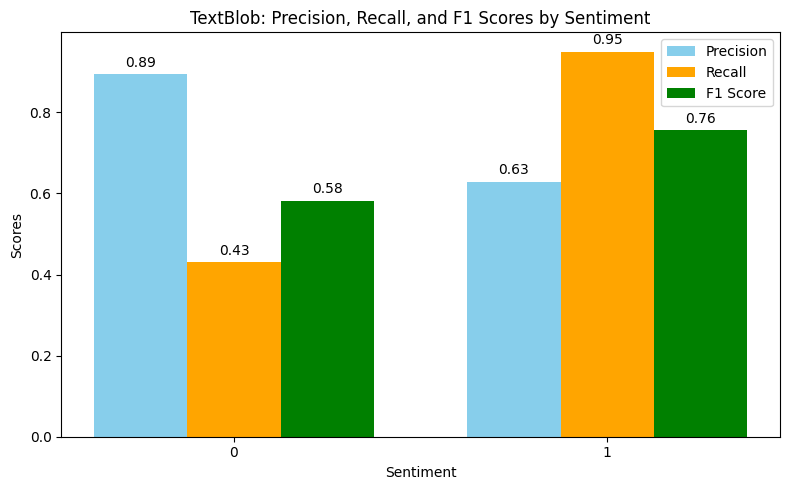

In [7]:
# Create the same style of bar plot as in the logistic regression notebook
report = classification_report(test_labels, test_predictions, output_dict=True)

categories = list(report.keys())[:2]
precision = [report[cat]['precision'] for cat in categories]
recall = [report[cat]['recall'] for cat in categories]
f1_score = [report[cat]['f1-score'] for cat in categories]

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
bars2 = ax.bar(x, recall, width, label='Recall', color='orange')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='green')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Scores')
ax.set_title('TextBlob: Precision, Recall, and F1 Scores by Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

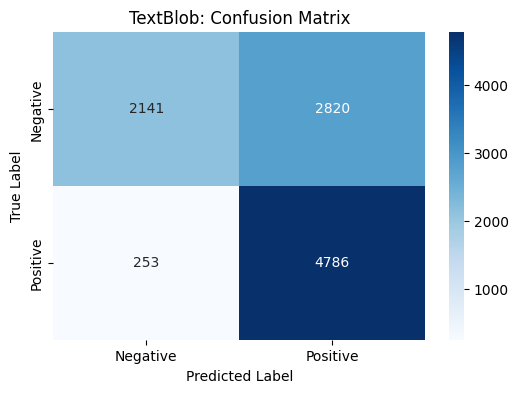

In [8]:
# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("TextBlob: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()